In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
df = pd.read_csv('my_project_env/sales_data/Sales_April_2019.csv')

In [3]:
files=[file for file in os.listdir('my_project_env/sales_data')]
all_months_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('my_project_env/sales_data/' + file)
    all_months_data = pd.concat([all_months_data,df])
    
all_months_data.to_csv('all_data.csv', index=False)

In [4]:
data = pd.read_csv('all_data.csv')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
data.columns

Index([u'Order ID', u'Product', u'Quantity Ordered', u'Price Each',
       u'Order Date', u'Purchase Address'],
      dtype='object')

In [6]:
data.columns=['Order_ID', 'Product', 'Quantity_Ordered', 'Price_Each','Order_Date','Purchase_Address']

In [7]:
data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [8]:
nan_df = data[data.isna().any(axis=1)]
display(nan_df.head())

data = data.dropna(how='all')
data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [9]:
data = data[data['Order_Date'].str[0:2]!='Or']

In [10]:
data['Month_num'] = data['Order_Date'].str[0:2]
data['Month_num'] = data['Month_num'].astype('int32')
data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month_num
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [11]:
data[['Date','Time']] = data.Order_Date.str.split(" ",expand=True,)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month_num,Date,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2019-04-19,08:46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,2019-04-07,22:30
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019-04-12,14:38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019-04-12,14:38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,2019-04-30,09:27


In [12]:
data['Month_name'] = data['Date'].dt.strftime('%b')
data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month_num,Date,Time,Month_name
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2019-04-19,08:46,Apr
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,2019-04-07,22:30,Apr
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019-04-12,14:38,Apr
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2019-04-12,14:38,Apr
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,2019-04-30,09:27,Apr


In [13]:
import calendar
data['Month_name'] = data['Month_name'].str.capitalize()
d = {i:e for e,i in enumerate(calendar.month_abbr)}
data = data.reindex(data['Month_name'].map(d).sort_values().index)
data.reset_index(drop=True,inplace=True)
data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month_num,Date,Time,Month_name
0,144361,Bose SoundSport Headphones,1,99.99,01/04/19 06:40,"249 River St, Austin, TX 73301",1,2019-01-04,06:40,Jan
1,144328,Wired Headphones,1,11.99,01/23/19 12:47,"332 River St, New York City, NY 10001",1,2019-01-23,12:47,Jan
2,144327,20in Monitor,1,109.99,01/15/19 20:42,"85 Elm St, Los Angeles, CA 90001",1,2019-01-15,20:42,Jan
3,144326,USB-C Charging Cable,1,11.95,01/25/19 12:22,"63 Center St, New York City, NY 10001",1,2019-01-25,12:22,Jan
4,144325,AA Batteries (4-pack),1,3.84,01/10/19 18:47,"777 10th St, Los Angeles, CA 90001",1,2019-01-10,18:47,Jan


# Question 1: What was the best month for sales? How much was earned that month?

In [14]:
data['Quantity_Ordered'] = pd.to_numeric(data['Quantity_Ordered'], errors='coerce')
data['Price_Each'] = pd.to_numeric(data['Price_Each'], errors='coerce')

In [15]:
data['Sales'] = data['Quantity_Ordered'].astype('int') * data['Price_Each'].astype('float')
data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month_num,Date,Time,Month_name,Sales
0,144361,Bose SoundSport Headphones,1,99.99,01/04/19 06:40,"249 River St, Austin, TX 73301",1,2019-01-04,06:40,Jan,99.99
1,144328,Wired Headphones,1,11.99,01/23/19 12:47,"332 River St, New York City, NY 10001",1,2019-01-23,12:47,Jan,11.99
2,144327,20in Monitor,1,109.99,01/15/19 20:42,"85 Elm St, Los Angeles, CA 90001",1,2019-01-15,20:42,Jan,109.99
3,144326,USB-C Charging Cable,1,11.95,01/25/19 12:22,"63 Center St, New York City, NY 10001",1,2019-01-25,12:22,Jan,11.95
4,144325,AA Batteries (4-pack),1,3.84,01/10/19 18:47,"777 10th St, Los Angeles, CA 90001",1,2019-01-10,18:47,Jan,3.84


In [16]:
result = data.groupby(['Month_num','Month_name'],sort=False).sum()
result.reset_index(inplace=True)
result

,Month_num,Month_name,Quantity_Ordered,Price_Each,Sales
0,1,Jan,10903,1.811768e+06,1.822257e+06
1,2,Feb,13449,2.188885e+06,2.202022e+06
2,3,Mar,17005,2.791208e+06,2.807100e+06
3,4,Apr,20558,3.367671e+06,3.390670e+06
4,5,May,18667,3.135125e+06,3.152607e+06
5,6,Jun,15253,2.562026e+06,2.577802e+06
6,7,Jul,16072,2.632540e+06,2.647776e+06
7,8,Aug,13448,2.230345e+06,2.244468e+06
8,9,Sep,13109,2.084992e+06,2.097560e+06
9,10,Oct,22703,3.715555e+06,3.736727e+06


In [17]:
from matplotlib import pyplot as plt

In [18]:
result[['Month_name','Sales']]

,Month_name,Sales
0,Jan,1.822257e+06
1,Feb,2.202022e+06
2,Mar,2.807100e+06
3,Apr,3.390670e+06
4,May,3.152607e+06
5,Jun,2.577802e+06
6,Jul,2.647776e+06
7,Aug,2.244468e+06
8,Sep,2.097560e+06
9,Oct,3.736727e+06


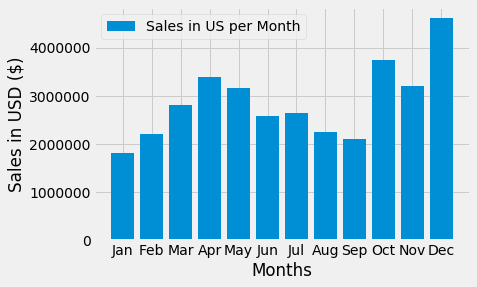

In [19]:
plt.style.use('fivethirtyeight')
plt.bar(result['Month_name'], result['Sales'],label='Sales in US per Month')
plt.xticks(result['Month_name'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months')
plt.legend()
plt.show()

# Question 2: Which city sold the most product?

In [20]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

data['City'] = data['Purchase_Address'].apply(lambda x: '{} ({})'.format(get_city(x),get_state(x)))
data.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month_num,Date,Time,Month_name,Sales,City
0,144361,Bose SoundSport Headphones,1,99.99,01/04/19 06:40,"249 River St, Austin, TX 73301",1,2019-01-04,06:40,Jan,99.99,Austin (TX)
1,144328,Wired Headphones,1,11.99,01/23/19 12:47,"332 River St, New York City, NY 10001",1,2019-01-23,12:47,Jan,11.99,New York City (NY)
2,144327,20in Monitor,1,109.99,01/15/19 20:42,"85 Elm St, Los Angeles, CA 90001",1,2019-01-15,20:42,Jan,109.99,Los Angeles (CA)
3,144326,USB-C Charging Cable,1,11.95,01/25/19 12:22,"63 Center St, New York City, NY 10001",1,2019-01-25,12:22,Jan,11.95,New York City (NY)
4,144325,AA Batteries (4-pack),1,3.84,01/10/19 18:47,"777 10th St, Los Angeles, CA 90001",1,2019-01-10,18:47,Jan,3.84,Los Angeles (CA)


In [21]:
result1 = data.groupby(['City'],sort=True).sum()
result1.reset_index(inplace=True)
result1

,City,Quantity_Ordered,Price_Each,Month_num,Sales
0,Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
1,Austin (TX),11153,1.809874e+06,69829,1.819582e+06
2,Boston (MA),22528,3.637410e+06,141112,3.661642e+06
3,Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
4,Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
5,New York City (NY),27932,4.635371e+06,175741,4.664317e+06
6,Portland (ME),2750,4.471893e+05,17144,4.497583e+05
7,Portland (OR),11303,1.860558e+06,70621,1.870732e+06
8,San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06
9,Seattle (WA),16553,2.733296e+06,104941,2.747755e+06


In [22]:
result1[['City','Sales']]

,City,Sales
0,Atlanta (GA),2.795499e+06
1,Austin (TX),1.819582e+06
2,Boston (MA),3.661642e+06
3,Dallas (TX),2.767975e+06
4,Los Angeles (CA),5.452571e+06
5,New York City (NY),4.664317e+06
6,Portland (ME),4.497583e+05
7,Portland (OR),1.870732e+06
8,San Francisco (CA),8.262204e+06
9,Seattle (WA),2.747755e+06


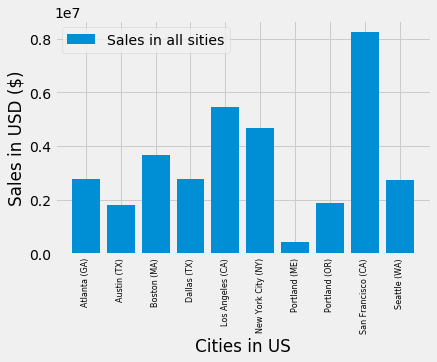

In [23]:
plt.style.use('fivethirtyeight')
plt.bar(result1['City'], result1['Sales'], label='Sales in all sities')
plt.xticks(result1['City'], rotation='vertical', size=8)
plt.xlabel('Cities in US')
plt.ylabel('Sales in USD ($)')
plt.legend()
plt.show()

# Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [24]:
data['Hour'] = pd.to_datetime(data['Order_Date']).dt.hour
data['Minute'] = pd.to_datetime(data['Order_Date']).dt.minute
data['Count'] = 1
data.head(3)

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month_num,Date,Time,Month_name,Sales,City,Hour,Minute,Count
0,144361,Bose SoundSport Headphones,1,99.99,01/04/19 06:40,"249 River St, Austin, TX 73301",1,2019-01-04,06:40,Jan,99.99,Austin (TX),6,40,1
1,144328,Wired Headphones,1,11.99,01/23/19 12:47,"332 River St, New York City, NY 10001",1,2019-01-23,12:47,Jan,11.99,New York City (NY),12,47,1
2,144327,20in Monitor,1,109.99,01/15/19 20:42,"85 Elm St, Los Angeles, CA 90001",1,2019-01-15,20:42,Jan,109.99,Los Angeles (CA),20,42,1


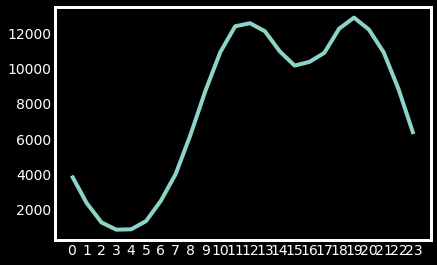

In [44]:
keys = [pair for pair, df in data.groupby(['Hour'])]
plt.style.use('dark_background')
plt.plot(keys, data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

# Question 4: Which products are most often sold together?

In [45]:
df = data[data['Order_ID'].duplicated(keep=False)]

In [46]:
df['Grouped'] = df.groupby('Order_ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order_ID','Grouped']].drop_duplicates()
df2.head()

/home/manasa/my_project_dir/my_project_env/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Order_ID,Grouped
20,144344,"USB-C Charging Cable,Google Phone"
26,144339,"Wired Headphones,iPhone"
83,144394,"Wired Headphones,Google Phone"
100,144414,"Lightning Charging Cable,iPhone"
248,144271,"Lightning Charging Cable,iPhone"


In [47]:
from itertools import combinations
from collections import Counter

In [48]:
count = Counter()
for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

(('Google Phone', 'USB-C Charging Cable'), 565)
(('iPhone', 'Lightning Charging Cable'), 542)
(('Lightning Charging Cable', 'iPhone'), 473)
(('USB-C Charging Cable', 'Google Phone'), 434)
(('iPhone', 'Wired Headphones'), 239)
(('Google Phone', 'Wired Headphones'), 236)
(('Wired Headphones', 'iPhone'), 223)
(('iPhone', 'Apple Airpods Headphones'), 210)
(('Vareebadd Phone', 'USB-C Charging Cable'), 195)
(('Wired Headphones', 'Google Phone'), 187)


# What product sold the most? Why do you think it sold the most?

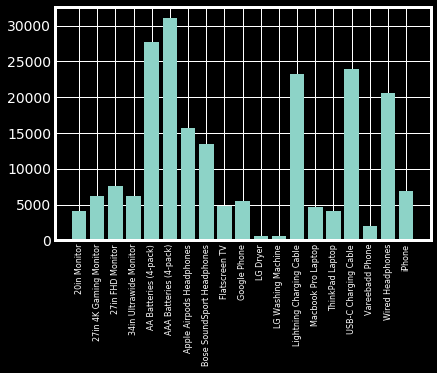

In [49]:
product_group = data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity_Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

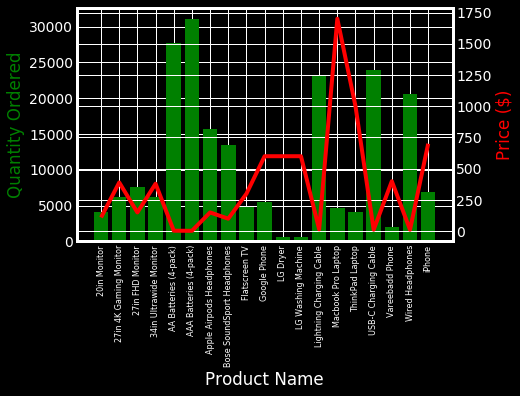

In [53]:
prices = data.groupby('Product').mean()['Price_Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='r')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()